Copyright (C) 2016 - 2019 Pinard Liu(liujianping-ok@163.com)

https://www.cnblogs.com/pinard

Permission given to modify the code as long as you keep this declaration at the top

MCMC(三)MCMC采样和M-H采样 https://www.cnblogs.com/pinard/p/6638955.html
MCMC(四)Gibbs采样 https://www.cnblogs.com/pinard/p/6645766.html

In [1]:
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

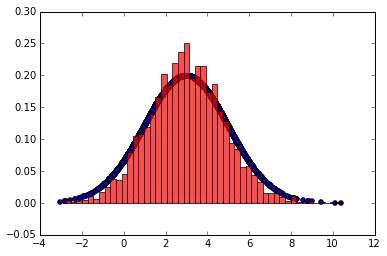

In [10]:
def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)
    #print theta_star
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))

    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2))
num_bins = 50
plt.hist(pi, num_bins, normed=1, facecolor='red', alpha=0.7)
plt.show()

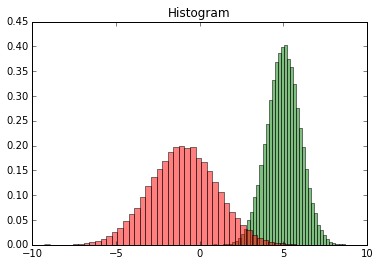

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
samplesource = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2) * s2))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2) * s1))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in xrange(N):
    for j in xrange(K):
        x = p_xgiveny(y, m1, m2, s1, s2)
        y = p_ygivenx(x, m1, m2, s1, s2)
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

num_bins = 50
plt.hist(x_res, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.hist(y_res, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.title('Histogram')
plt.show()

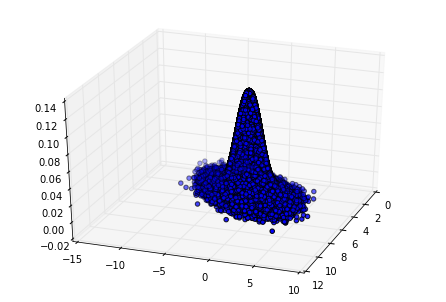

In [31]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o')
plt.show()